In [38]:
import pandas as pd
import json

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", font_scale=1.15, context='paper')

In [27]:
# Load json file
with open('../data/week_2022_48.json') as f:
    data = json.load(f)

In [61]:
columns_renewable = [
    'Hydro water reservoir',
    'Hydro pumped storage',
    'Hydro Run-of-River',
    'Waste',
    'Wind offshore',
    'Wind onshore',
    'Solar',
    'Biomass',
    'Geothermal',
]

columns_fossil = [
    'Others',
    'Nuclear',
    'Coal',
    'Fossil brown coal / lignite',
    'Fossil hard coal',
    'Fossil oil',
    'Fossil gas'
]

index = pd.to_datetime(data[0]['xAxisValues'], unit='ms')
df_renewable = pd.DataFrame(index=index)
df_fossil = pd.DataFrame(index=index)

for ts in data:

    if ts['name']['en'] == 'Load':
        load = pd.Series(ts['data'], index=index)
    elif ts['name']['en'] in columns_renewable:
        df_renewable[ts['name']['en']] = ts['data']
    elif ts['name']['en'] in columns_fossil:
        df_fossil[ts['name']['en']] = ts['data']

<AxesSubplot:title={'center':'Over capacity'}>

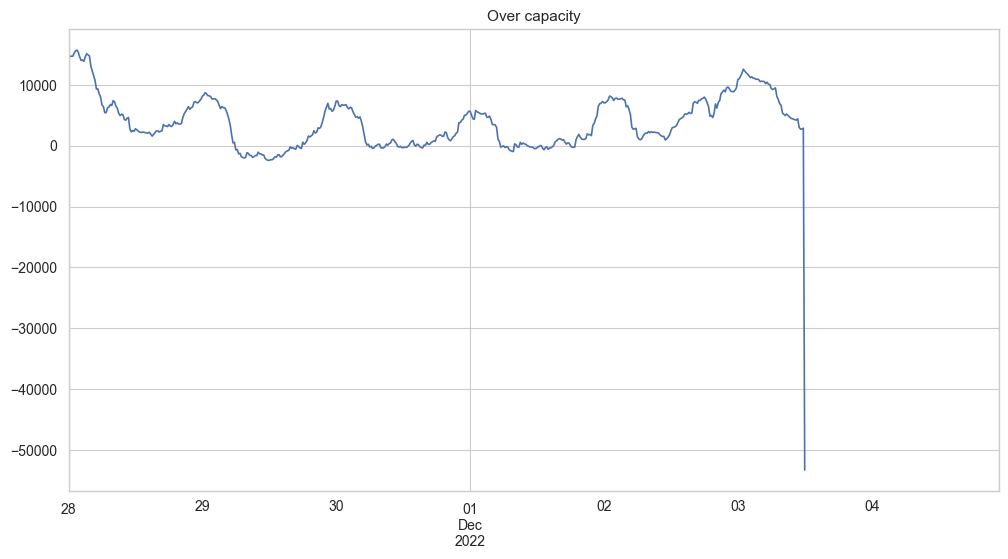

In [63]:
# All in MW
renewable_total = df_renewable.sum(axis=1)
fossil_total = df_fossil.sum(axis=1)
total = renewable_total + fossil_total
over_capacity = total - load
over_capacity_over_threshold = over_capacity[over_capacity > 5000]


over_capacity.plot(figsize=(12, 6), title='Over capacity')

<AxesSubplot:>

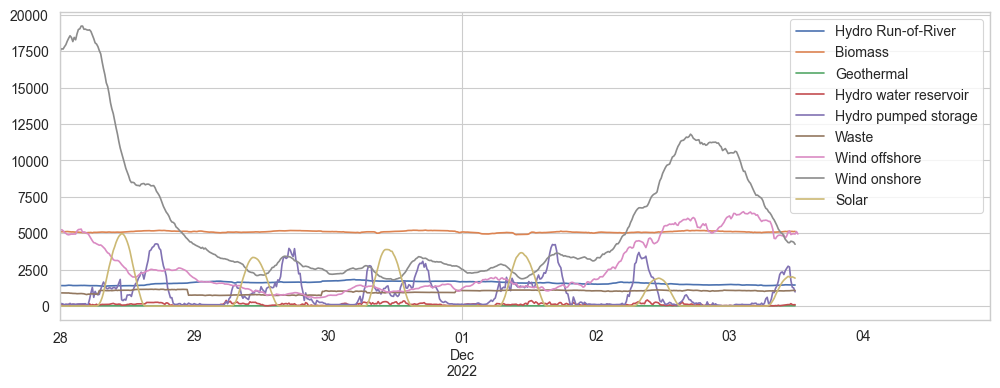

In [53]:
df_renewable.plot(figsize=(12, 4))